In [2]:
import torch
import tensorflow as tf
%load_ext autoreload

# enable GPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
x = torch.rand(size=(3, 4)).to(device)

gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

In [3]:
%autoreload 2
from data_loader import load_image_data
import config

X_train_orig, X_val_orig, y_train_orig, y_val_orig, label_map_orig = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(224, 224),
    images_per_label=1000,
    validation_split=0.2,
)

Error loading /Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/data/plant_data/PlantVillage/Tomato_Septoria_leaf_spot/33da87e2-f2c6-4a99-bc3c-279f47120681___JR_Sept.L.S 2667.JPG: cannot identify image file '/Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/data/plant_data/PlantVillage/Tomato_Septoria_leaf_spot/33da87e2-f2c6-4a99-bc3c-279f47120681___JR_Sept.L.S 2667.JPG'


In [ ]:
from data_loader import load_image_data_with_augmentation

X_train_aug, X_val_aug, y_train_aug, y_val_aug, label_map_aug = load_image_data_with_augmentation(
    csv_file=config.CSV_FILE,
    img_size=(224, 224),
    load_all_images=True,
    validation_split=0.2,
)

In [4]:
heads_map = {
    'EfficientNetB3': ['simple'],
    'MobileNetV2': ['simple', 'dense_dropout'],
    'DenseNet121': ['simple'],
}

In [ ]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results

#MobileNetV2

results = evaluate_model(
    X_train_orig,
    X_val_orig,
    y_train_orig,
    y_val_orig,
    label_map_orig,
    'MobileNetV2',
    100,
    doAutostop=True,
    heads_map=heads_map
)

update_results(results, "results_improved_mobilenet.pkl")

In [ ]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results

#MobileNetV2

results = evaluate_model(
    X_train_aug,
    X_val_aug,
    y_train_aug,
    y_val_aug,
    label_map_aug,
    'MobileNetV2',
    100,
    doAutostop=True,
    heads_map=heads_map
)

update_results(results, "results_aug_mobilenet.pkl")

In [5]:
%autoreload 2
from data_loader import load_image_data
import config

#EfficientNetB3
X_train_orig_300, X_val_orig_300, y_train_orig_300, y_val_orig_300, label_map_orig = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(300, 300),
    images_per_label=1000,
    validation_split=0.2,
    preprocessing="efficient"
)

In [5]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results


results = evaluate_model(
    X_train_orig_300,
    X_val_orig_300,
    y_train_orig_300,
    y_val_orig_300,
    label_map_orig,
    'EfficientNetB3',
    100,
    doAutostop=True,
    heads_map=heads_map
)

display(results)

update_results(results,"results_improved_efficientnet_b3.pkl" )

2025-06-11 21:50:11.749855: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-11 21:50:11.749883: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-11 21:50:11.749886: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-11 21:50:11.749897: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-11 21:50:11.749907: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


['simple']
simple
<function head_simple at 0x32f44ab90>
Training EfficientNetB3 with head simple...


2025-06-11 21:51:00.675882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Evaluating EfficientNetB3 with head simple...
85/85 ━━━━━━━━━━━━━━━━━━━━ 58s 658ms/step


,backbone,head,accuracy,f1_score,end_val_loss,history,y_true,y_pred
0,EfficientNetB3,simple,0.969944,0.969993,0.097733,"{'accuracy': [0.7788087129592896, 0.9017443060...","[8, 11, 7, 13, 2, 10, 7, 14, 2, 6, 4, 5, 14, 5...","[8, 11, 7, 13, 2, 11, 7, 14, 2, 6, 4, 5, 14, 5..."


In [ ]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

#EfficientNetB3
X_train_aug_300, X_val_aug_300, y_train_aug_300, y_val_aug_300, label_map_orig = load_image_data_with_augmentation(
    csv_file=config.CSV_FILE,
    img_size=(300, 300),
    load_all_images=True,
    validation_split=0.2,
)

results = evaluate_model(
    X_train_aug_300,
    X_val_aug_300,
    y_train_aug_300,
    y_val_aug_300,
    label_map_orig,
    'EfficientNetB3',
    100,
    doAutostop=True,
    heads_map=heads_map
)

update_results(results,"results_aug_efficientnet_b3.pkl" )

In [3]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results

from data_loader import load_image_data
import config

X_train_orig, X_val_orig, y_train_orig, y_val_orig, label_map_orig = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(224, 224),
    images_per_label=1000,
    validation_split=0.2,
)

#DenseNet121

results = evaluate_model(
    X_train_orig,
    X_val_orig,
    y_train_orig,
    y_val_orig,
    label_map_orig,
    'DenseNet121',
    100,
    doAutostop=True,
    heads_map=heads_map
)

update_results(results, "results_improved_densenet.pkl")

2025-06-11 21:11:36.593957: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-11 21:11:36.593988: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-11 21:11:36.593991: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-11 21:11:36.594004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-11 21:11:36.594013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


['simple']
simple
<function head_simple at 0x32b8b5cf0>
Training DenseNet121 with head simple...


2025-06-11 21:11:41.327806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Evaluating DenseNet121 with head simple...
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step


In [ ]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results

#DenseNet121

results = evaluate_model(
    X_train_aug,
    X_val_aug,
    y_train_aug,
    y_val_aug,
    label_map_aug,
    'DenseNet121',
    100,
    doAutostop=True,
    heads_map=heads_map
)

update_results(results, "results_aug_densenet.pkl")

,backbone,head,accuracy,f1_score,end_val_loss,history,y_true,y_pred
0,EfficientNetB3,simple,0.969944,0.969993,0.097733,"{'accuracy': [0.7788087129592896, 0.9017443060...","[8, 11, 7, 13, 2, 10, 7, 14, 2, 6, 4, 5, 14, 5...","[8, 11, 7, 13, 2, 11, 7, 14, 2, 6, 4, 5, 14, 5..."
1,DenseNet121,simple,0.934323,0.934271,0.198201,"{'accuracy': [0.7245569825172424, 0.8808794617...","[8, 11, 7, 13, 2, 10, 7, 14, 2, 6, 4, 5, 14, 5...","[8, 11, 7, 13, 2, 10, 7, 14, 2, 6, 4, 5, 14, 5..."


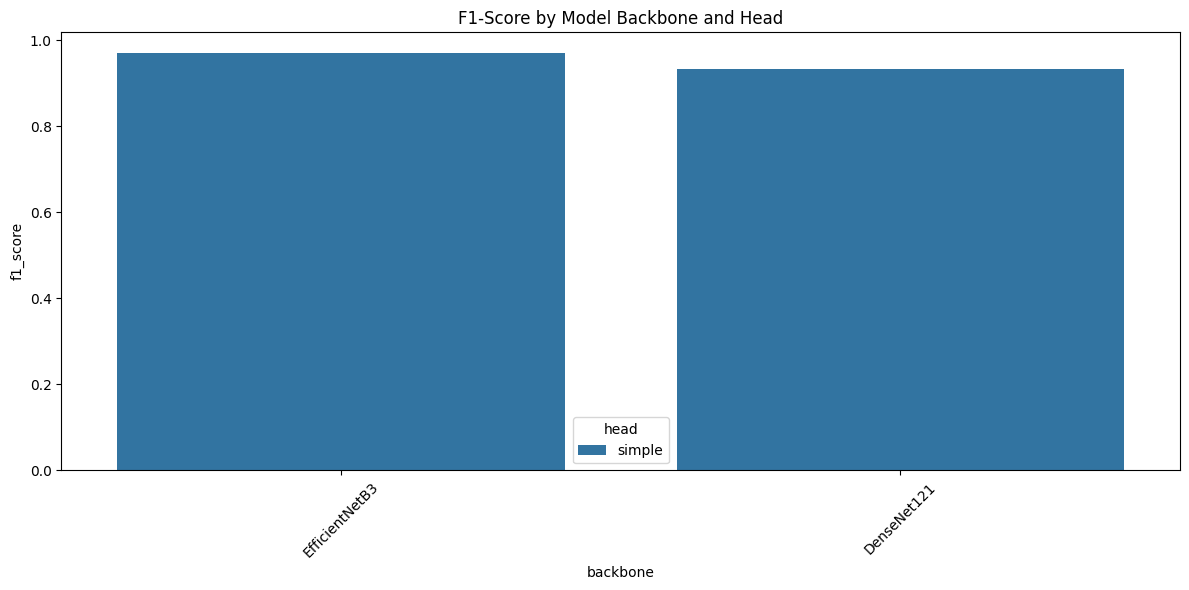

Model: EfficientNetB3 + simple, F1-Score: 97.00%, Accuracy: 96.99%, Final Val_loss: 9.77%


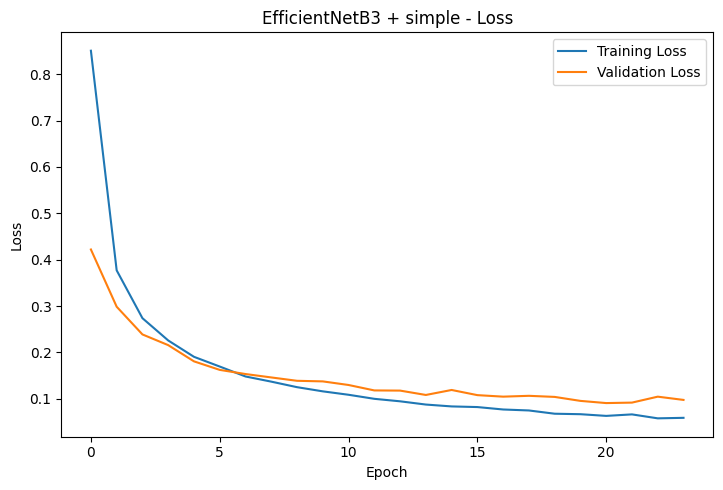

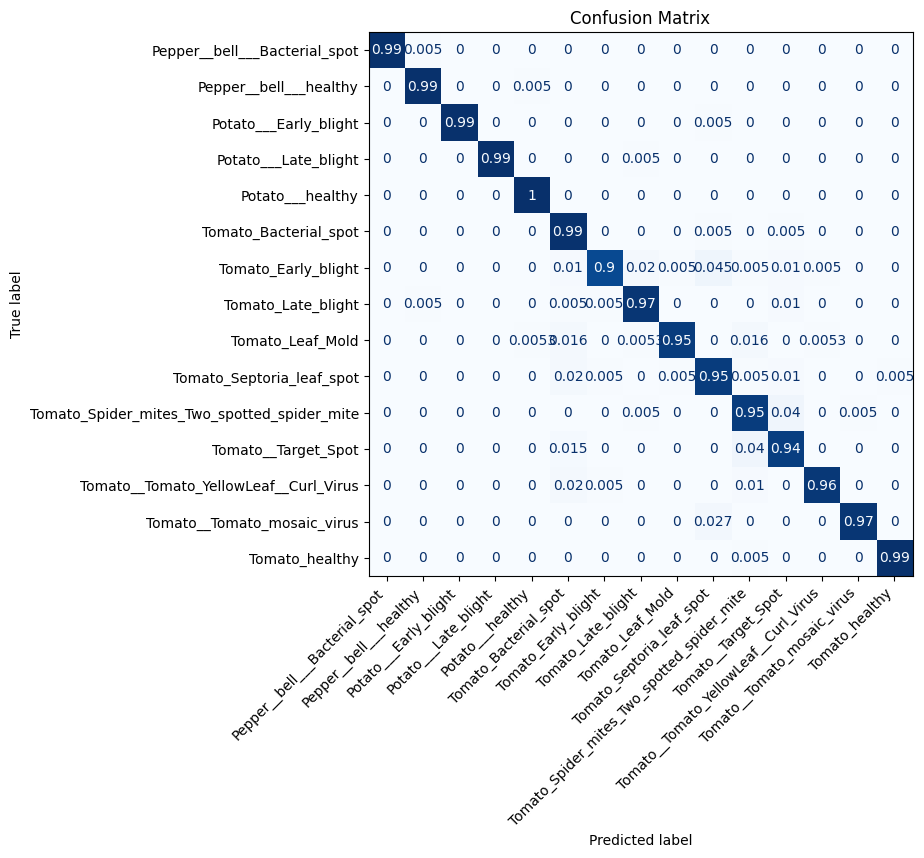

Model: DenseNet121 + simple, F1-Score: 93.43%, Accuracy: 93.43%, Final Val_loss: 19.82%


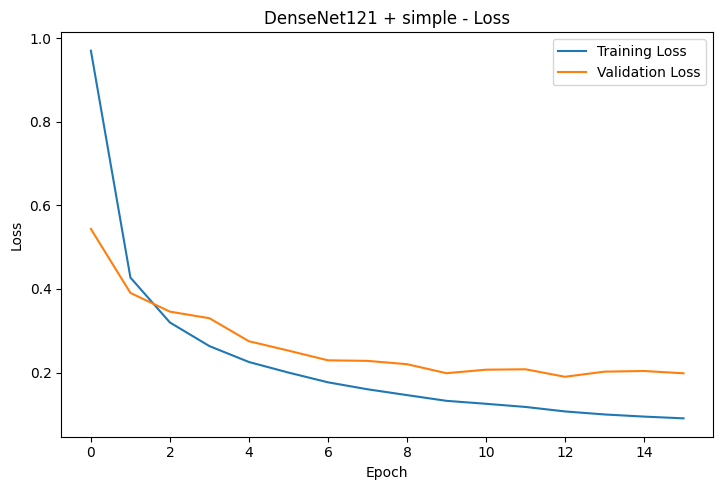

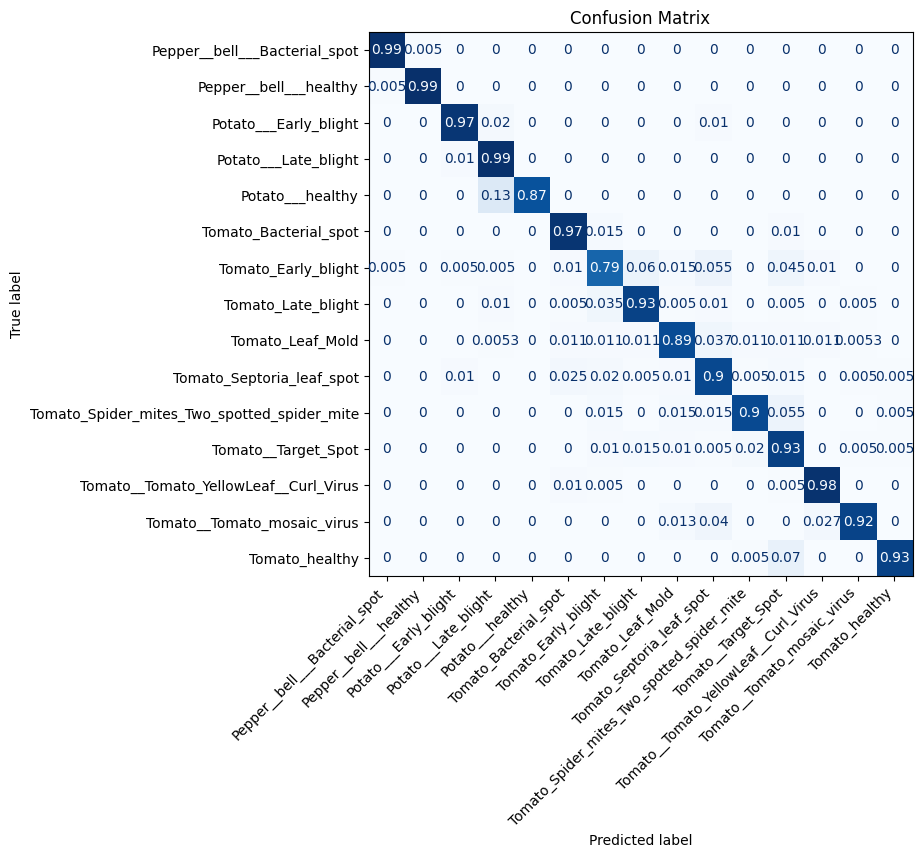

In [6]:
%autoreload 2

# Display results
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix
from data_loader import load_results_from_pickles

result_files = {
    "EfficientNetB3": "results_improved_efficientnet_b3.pkl",
    "DenseNet121": "results_improved_densenet.pkl"
}

results = load_results_from_pickles(result_files)

# print(results)
results.style.format({"accuracy": "{:.2%}", "f1_score": "{:.2%}"})

top_results = results.sort_values(by="f1_score", ascending=False)
display(top_results)
# TODO start loss noch in Tabelle aufnehmen, history, y_true, y_pred defür weg

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="backbone", y="f1_score", hue="head")
plt.title("F1-Score by Model Backbone and Head")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for result in results.itertuples():
    print(f"Model: {result.backbone} + {result.head}, F1-Score: {result.f1_score:.2%}, Accuracy: {result.accuracy:.2%}, Final Val_loss: {result.end_val_loss:.2%}")
    # Plot accuracy and loss
    plot_loss_curves(result.history['loss'], result.history['val_loss'], model_name= f"{result.backbone} + {result.head}")

    # Plot confusion matrix
    plot_conf_matrix(
        y_true=result.y_true,
        y_pred=result.y_pred,
        class_names=list(label_map_orig.keys()),
        normalize='true'
    )

In [6]:
from model_benchmark import evaluate_initial_loss

initial_eval_dense = evaluate_initial_loss(
    X_val_orig,
    y_val_orig,
    label_map_orig,
    'DenseNet121',
    heads_map=heads_map
)

initial_eval_efficient = evaluate_initial_loss(
    X_val_orig_300,
    y_val_orig_300,
    label_map_orig,
    'EfficientNetB3',
    heads_map=heads_map
)

2025-06-16 14:00:38.769491: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-16 14:00:38.772574: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-16 14:00:38.772577: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-16 14:00:38.772768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-16 14:00:38.772783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


['simple']
simple
<function head_simple at 0x333d96950>


2025-06-16 14:00:46.849234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


['simple']
simple
<function head_simple at 0x333d96950>


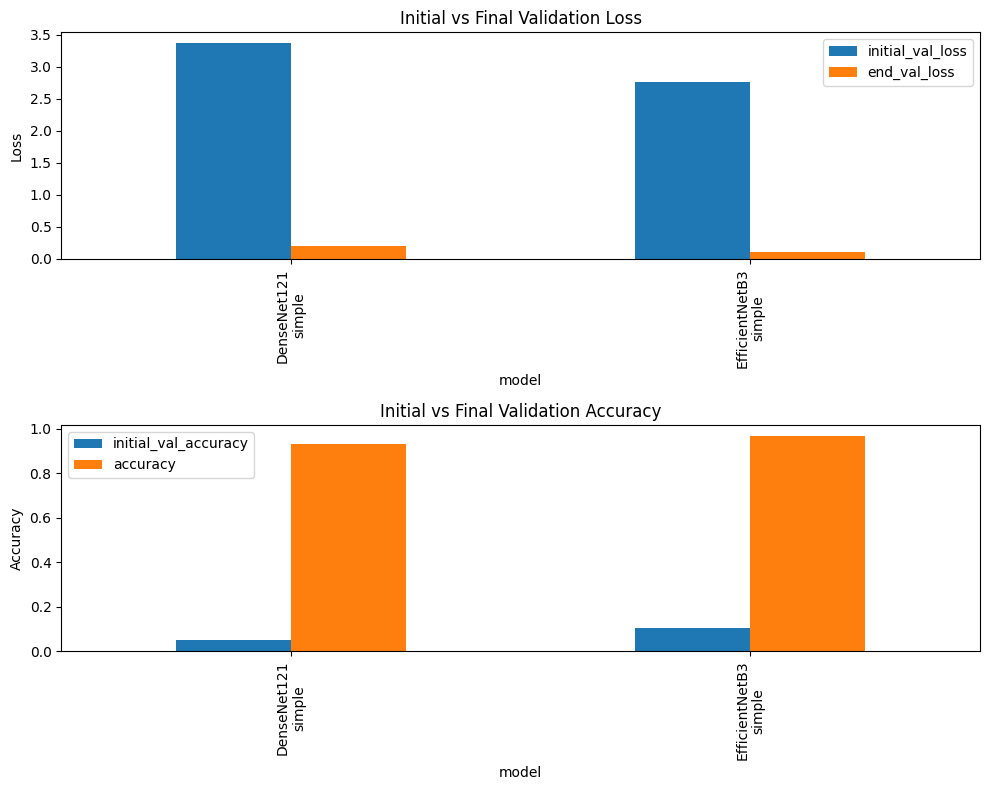

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Display results
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix
from data_loader import load_results_from_pickles

result_files = {
    "EfficientNetB3": "results_improved_efficientnet_b3.pkl",
    "DenseNet121": "results_improved_densenet.pkl"
}

df_final = load_results_from_pickles(result_files)

df_initial = pd.concat([initial_eval_dense, initial_eval_efficient], ignore_index=True)

# Merge both dataframes on 'backbone' and 'head'
df_merged = pd.merge(df_initial, df_final, on=["backbone", "head"])

# Create a combined identifier column for plotting
df_merged["model"] = df_merged["backbone"] + "\n" + df_merged["head"]

# Create a bar chart comparing initial vs final loss and accuracy
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Loss comparison
df_merged.plot(x="model", 
               y=["initial_val_loss", "end_val_loss"], 
               kind="bar", 
               ax=axes[0],
               title="Initial vs Final Validation Loss")
axes[0].set_ylabel("Loss")

# Accuracy comparison
df_merged.plot(x="model", 
               y=["initial_val_accuracy", "accuracy"], 
               kind="bar", 
               ax=axes[1],
               title="Initial vs Final Validation Accuracy")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()